<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/PracticeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'A':[1,2,3,4],
                   'B':["yes","no","no","yes"],
                   'C':[4,5,6,8],
                   'D':[7,8,9,11],
                   'E':[1,3,5,15],
                   'F':[5,3,6,12],
                   'G':["P","N","N","P"],
                   })
df

,A,B,C,D,E,F,G
0,1,yes,4,7,1,5,P
1,2,no,5,8,3,3,N
2,3,no,6,9,5,6,N
3,4,yes,8,11,15,12,P


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:,6].values

In [4]:
X

array([[1, 'yes', 4, 7, 1, 5],
       [2, 'no', 5, 8, 3, 3],
       [3, 'no', 6, 9, 5, 6],
       [4, 'yes', 8, 11, 15, 12]], dtype=object)

In [5]:
y

array(['P', 'N', 'N', 'P'], dtype=object)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
X

array([[0.0, 1.0, 1, 4, 7, 1, 5],
       [1.0, 0.0, 2, 5, 8, 3, 3],
       [1.0, 0.0, 3, 6, 9, 5, 6],
       [0.0, 1.0, 4, 8, 11, 15, 12]], dtype=object)

In [8]:
y

array(['P', 'N', 'N', 'P'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([1, 0, 0, 1])

In [20]:
X= np.asarray(X)
y= np.asarray(y)

In [21]:
X

array([[0.0, 1.0, 1, 4, 7, 1, 5],
       [1.0, 0.0, 2, 5, 8, 3, 3],
       [1.0, 0.0, 3, 6, 9, 5, 6],
       [0.0, 1.0, 4, 8, 11, 15, 12]], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
if X.shape[2] != y.shape[2]:
  print("X and y rows are mismatched, check dataset again")
else:
  print("Ok")

IndexError: ignored

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#X_train = reshape((1,1))
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)


ValueError: ignored

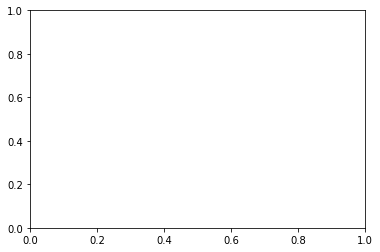

In [18]:
plt.scatter(X_train.reshape(-1,1), y_train.reshape(-1,1), marker='X',color='red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color='blue')
plt.title('Test')
plt.xlabel('A')
plt.ylabel('D')
plt.show()
